In [1]:
import numpy as np

# Decision Region

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

class CPlane():
  def __init__(self,rows,cols):
    self.rows = rows
    self.cols = cols
    self.origin = dict({'r':math.floor(rows/2), 'c':math.floor(cols/2)})
    self.screen = self.__get_screen()
  
  def __get_screen(self):
    screen = np.zeros((self.rows, self.cols))
    return screen
  
  def set(self,x,y, value):
    self.screen[self.origin['r']-y][self.origin['c']+x]=value
  
  def get_corners(self):
    maxx = self.origin['c'] - (1 if self.cols%2==0 else 0)
    maxy = self.origin['r'] - (1 if self.rows%2==0 else 0)
    tl = (-self.origin['c'], self.origin['r'])
    tr = (maxx, self.origin['r'])
    bl= (-self.origin['c'], -maxy)
    br = (maxx,-maxy)
    return tl, tr, bl, br

  def show(self, figsize=(10,10)):
    #TODO axes off
    plt.figure(figsize=figsize)
    plt.xticks([self.origin['c']], labels=['0'])
    plt.yticks([self.origin['r']], labels=['0'])
    plt.imshow(self.screen, interpolation=None)
  

s = CPlane(100,100)

# Generating Data

In [3]:
from sklearn.datasets import make_classification #to create the dataset
import matplotlib.pyplot as plt

In [4]:
# Create a binary class dataset 
X,y = make_classification(n_samples=200,n_features=2,n_informative=2,n_classes=2, n_redundant=0)

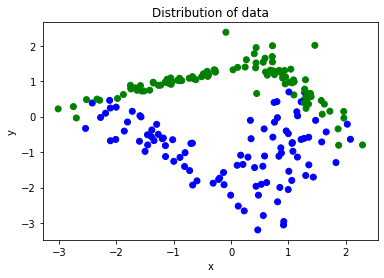

In [5]:
#Plot the distribution of dataset
colors = ["blue","green"]
plt.scatter(X[:,0], X[:,1], color=[ colors[i] for i in y])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Distribution of data")
plt.show()

In [6]:
X.shape

(200, 2)

In [7]:
y.shape

(200,)

# Perceptron Algorithm

```
P <- Inputs with label 1  
N <- Inputs with label 0  
w <- Initialize randomly

while (!convergence)  
do,  
    Pick a random x in X
  
        if ( x belongs to P) and (w.x < 0)  
        then,
            w <- w+x
        else if ( x belongs to N) and (w.x >= 0)
        then,
            w <- w-x
        endif
endwhile

//algorithm converges when all the inputs are classified correctly
```

# Defining Perceptron Model

In [8]:
class Perceptron():
  def __init__(self, n):
    '''n: Feature dimension.'''
    self.w = np.random.rand(n)  #random initialization
    
  def predict(self,x):
    if len(x)==len(self.w):
      return self.w@x
    return None

In [9]:
P = Perceptron(n=2)

In [10]:
P.predict(X[0]) #sample prediction

-0.8793496218844213

# Training Perceptron

In [11]:
def convergence(model, X,y):
  for i in range(len(X)):
    if model.predict(X[i])<0 and y[i]==1:
      return False
    if model.predict(X[i])>=0 and y[i]==0:
      return False
  return True


def train(model, X,y):
  
  LIMIT = len(y)*20; # the model may not converge; stop after certain number of iteration
  iter=0
  while (not convergence(model,X,y)) and iter<LIMIT:

    idx = np.random.randint(low=0, high=len(X))
    x = X[idx]
    
    if model.predict(x)<0 and y[idx]==1:
      model.w += x
    if model.predict(x)>=0 and y[idx]==0:
      model.w -=x
    iter +=1

In [12]:
train(P,X,y)

# Visualizing Decision Boundary

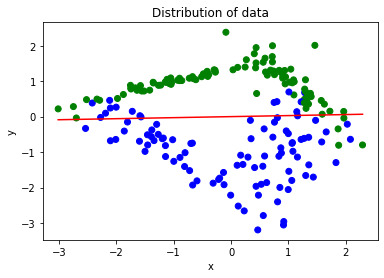

In [13]:
#distribution of dataset
colors = ["blue","green"]
plt.scatter(X[:,0], X[:,1], color=[ colors[i] for i in y])

samplex = [X[:,0].min(), X[:,0].max()]
boundary = lambda x: -(P.w[0]/P.w[1])*x
yy = [boundary(e) for e in samplex]

plt.plot(samplex, yy, color="red", label="Decision Boundary")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Distribution of data")
plt.show()

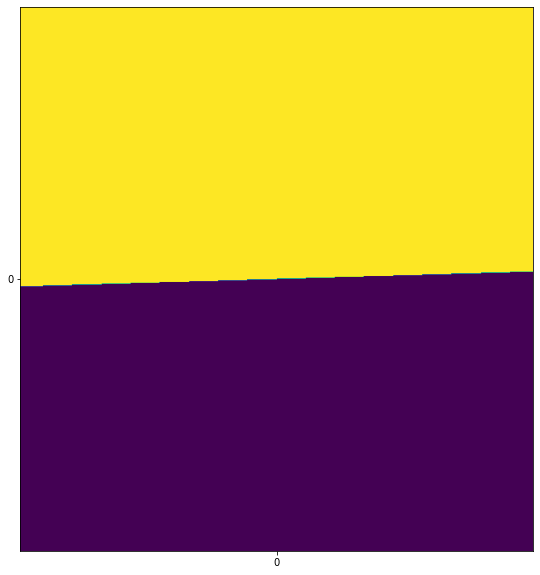

In [14]:
s = CPlane(int(abs(X[:,1]).max()*100)*2+1, int(abs(X[:,0]).max()*100)*2+1)
tl,tr,bl,br = s.get_corners()

for x in range(tl[0],br[0]+1):
  for yy in range(tl[1], br[1]-1, -1):
    s.set(x,yy,0 if P.predict([x,yy])<0 else 1)

s.show()
